## Loan Prosper Data Exploration

### Initial observations of the data set

This dataset contains 113,937 loans with 81 variables on each loan, including loan amount, interest rate, current loan status, borrower's income and many others.

In [1]:
# importing the packages needed for analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# reading the data set
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# checking number of rows and columns
df.shape

(113937, 81)

### What is the structure of your dataset?

The data set has over 113,000 records and 81 columns according to the link **[features](<https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0>)**. Checking the meaning of each column, I choose to work with only a few of them. Are they:

- `ListingKey` - Unique key for each listing, same value as the 'key' used in the listing object in the API.
- `Term` - The length of the loan expressed in months.
- `BorrowerAPR` - The Borrower's Annual Percentage Rate (APR) for the loan.
- `ProsperRating (Alpha)` - The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
- `EmploymentStatus` - The employment status of the borrower at the time they posted the listing.
- `IsBorrowerHomeowner` - A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- `CurrentCreditLines` - Number of current credit lines at the time the credit profile was pulled.
- `LoanOriginalAmount` - The origination amount of the loan.

### What is/are the main feature(s) of interest in your dataset?
I intend to answer according to the following questions below:

- What factors affect Prosper's alpha rating?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think the features `Term`, `EmploymentStatus` and `CurrentCreditLinesange` will have a greater impact on the results of borrowing or not from the borrower. I will investigate further the other variables and try to find out if the others also impact the results.

### Choosing the best data set characteristics

In [4]:
# slicing the dataset
df_loan = df[['ListingKey', 'Term', 'BorrowerAPR', 'ProsperRating (Alpha)', 'EmploymentStatus',
              'IsBorrowerHomeowner', 'CurrentCreditLines', 'LoanOriginalAmount']]

### Exploring the final dataset

In [5]:
# checking number of rows and columns
df_loan.shape

(113937, 8)

In [6]:
df_loan.head()

,ListingKey,Term,BorrowerAPR,ProsperRating (Alpha),EmploymentStatus,IsBorrowerHomeowner,CurrentCreditLines,LoanOriginalAmount
0,1021339766868145413AB3B,36,0.16516,NaN,Self-employed,True,5.0,9425
1,10273602499503308B223C1,36,0.12016,A,Employed,False,14.0,10000
2,0EE9337825851032864889A,36,0.28269,NaN,Not available,False,NaN,3001
3,0EF5356002482715299901A,36,0.12528,A,Employed,True,5.0,10000
4,0F023589499656230C5E3E2,36,0.24614,D,Employed,True,19.0,15000


In [7]:
df_loan['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [8]:
# changing the variable name
df_loan.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_alpha'}, inplace = True)

C:\Users\jeffe\Anaconda3\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
# info () function shows the data type of each variable and the amount of non-null data
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingKey           113937 non-null  object 
 1   Term                 113937 non-null  int64  
 2   BorrowerAPR          113912 non-null  float64
 3   ProsperRating_alpha  84853 non-null   object 
 4   EmploymentStatus     111682 non-null  object 
 5   IsBorrowerHomeowner  113937 non-null  bool   
 6   CurrentCreditLines   106333 non-null  float64
 7   LoanOriginalAmount   113937 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 6.2+ MB


In [10]:
# adding the null values of the 'prosperrating' variable
df_loan.ProsperRating_alpha.isnull().sum()

29084

In [11]:
# whatever null value I changed to 'unrated' this to get analysis errors in the future
df_loan.update(df_loan['ProsperRating_alpha'].fillna('Unrated'))

C:\Users\jeffe\Anaconda3\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [12]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingKey           113937 non-null  object 
 1   Term                 113937 non-null  int64  
 2   BorrowerAPR          113912 non-null  float64
 3   ProsperRating_alpha  113937 non-null  object 
 4   EmploymentStatus     111682 non-null  object 
 5   IsBorrowerHomeowner  113937 non-null  bool   
 6   CurrentCreditLines   106333 non-null  float64
 7   LoanOriginalAmount   113937 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 6.2+ MB


In [13]:
# whatever is null changing to 0
df_loan.update(df_loan['BorrowerAPR'].fillna(0))

In [14]:
df_loan.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [15]:
# excluding null values from 'EmploymentStatus'
df_loan = df_loan.dropna(subset=['EmploymentStatus'])

In [16]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111682 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingKey           111682 non-null  object 
 1   Term                 111682 non-null  int64  
 2   BorrowerAPR          111682 non-null  float64
 3   ProsperRating_alpha  111682 non-null  object 
 4   EmploymentStatus     111682 non-null  object 
 5   IsBorrowerHomeowner  111682 non-null  bool   
 6   CurrentCreditLines   106333 non-null  float64
 7   LoanOriginalAmount   111682 non-null  int64  
dtypes: bool(1), float64(2), int64(2), object(3)
memory usage: 6.9+ MB


In [17]:
# excluding null values from 'CurrentCreditLines'
df_loan = df_loan.dropna(subset=['CurrentCreditLines'])

In [18]:
df_loan.IsBorrowerHomeowner.value_counts()

True     54919
False    51414
Name: IsBorrowerHomeowner, dtype: int64

In [19]:
# transforming the data type to 'str'
df_loan.IsBorrowerHomeowner = df_loan.IsBorrowerHomeowner.astype(str)

In [20]:
# replacing true with yes and false with no
df_loan.IsBorrowerHomeowner = df_loan.IsBorrowerHomeowner.str.replace('True', 'Yes')
df_loan.IsBorrowerHomeowner = df_loan.IsBorrowerHomeowner.str.replace('False', 'No')

In [21]:
df_loan.IsBorrowerHomeowner.value_counts()

Yes    54919
No     51414
Name: IsBorrowerHomeowner, dtype: int64

In [22]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106333 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingKey           106333 non-null  object 
 1   Term                 106333 non-null  int64  
 2   BorrowerAPR          106333 non-null  float64
 3   ProsperRating_alpha  106333 non-null  object 
 4   EmploymentStatus     106333 non-null  object 
 5   IsBorrowerHomeowner  106333 non-null  object 
 6   CurrentCreditLines   106333 non-null  float64
 7   LoanOriginalAmount   106333 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 7.3+ MB


In [23]:
# changing the data type from currentcreditlines to int
df_loan.CurrentCreditLines = df_loan.CurrentCreditLines.astype(int)

In [24]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106333 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingKey           106333 non-null  object 
 1   Term                 106333 non-null  int64  
 2   BorrowerAPR          106333 non-null  float64
 3   ProsperRating_alpha  106333 non-null  object 
 4   EmploymentStatus     106333 non-null  object 
 5   IsBorrowerHomeowner  106333 non-null  object 
 6   CurrentCreditLines   106333 non-null  int32  
 7   LoanOriginalAmount   106333 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(4)
memory usage: 6.9+ MB


In [25]:
# checking for duplicate values
df_loan.duplicated().sum()

871

In [26]:
# using the pandas concat () function and a for loop listing the same records more than once
pd.concat(g for _, g in df_loan.groupby("ListingKey") if len(g) > 1).head()

,ListingKey,Term,BorrowerAPR,ProsperRating_alpha,EmploymentStatus,IsBorrowerHomeowner,CurrentCreditLines,LoanOriginalAmount
32680,00223594917038064A7C947,36,0.23540,C,Employed,No,18,5000
32681,00223594917038064A7C947,36,0.23540,C,Employed,No,18,5000
17274,00473590513960687DD308F,60,0.22242,C,Employed,Yes,21,25000
32964,00473590513960687DD308F,60,0.22242,C,Employed,Yes,21,25000
7478,0098360461900952056DB93,36,0.29660,E,Employed,No,23,4000


This link helped me a lot to identify and corroborate duplicate records.

https://qastack.com.br/programming/14657241/how-do-i-get-a-list-of-all-the-duplicate-items-using-pandas-in-python#:~:text=Com%20o%20Pandas%20vers%C3%A3o%200.17,obter%20todos%20os%20itens%20duplicados.&text=ele%20retornar%C3%A1%20todas%20as%20linhas%20duplicadas%20de%20volta%20para%20voc%C3%AA.&text=primeiro%3A%20marcar%20duplicatas%20como%20verdadeiras%2C%20exceto%20para%20a%20primeira%20ocorr%C3%AAncia.

In [27]:
# deleting duplicate values
df_loan = df_loan.drop_duplicates()

In [28]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105462 entries, 0 to 113936
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingKey           105462 non-null  object 
 1   Term                 105462 non-null  int64  
 2   BorrowerAPR          105462 non-null  float64
 3   ProsperRating_alpha  105462 non-null  object 
 4   EmploymentStatus     105462 non-null  object 
 5   IsBorrowerHomeowner  105462 non-null  object 
 6   CurrentCreditLines   105462 non-null  int32  
 7   LoanOriginalAmount   105462 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(4)
memory usage: 6.8+ MB


After a few lines of code using pandas to investigate the dataset, I found many null values in many variables that I understand are important for analysis. Wrong data types that could get in the way up front. Therefore, I delete missing numeric records and replace non-numeric values with some word. I also found 871 duplicate records, which I deleted so as not to erroneously infer in the analysis.

In [29]:
# The data set with the modifications
df_loan.to_csv('df_loan_status.csv', index=False)

### Univariate Exploration

#### 1. How many borrowers are applying for a loan, by term and who do or do not have a mortgage in their name?

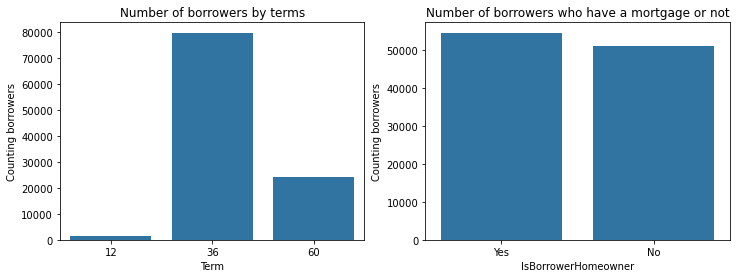

In [42]:
# creating subplots in two columns, and choosing the size for viewing
fig, ax = plt.subplots(ncols=2, figsize = [12,4])

# defining the color palette, which will be the default color
default_color = sns.color_palette()[0]

# plotting the graphs, in two columns
a = sns.countplot(data = df_loan, x = 'Term', color = default_color, ax = ax[0])
b = sns.countplot(data = df_loan, x = 'IsBorrowerHomeowner', color = default_color, ax = ax[1])

ax[0].set_title('Number of borrowers by terms')
ax[1].set_title('Number of borrowers who have a mortgage or not')

ax[0].set_ylabel('Counting borrowers')
ax[1].set_ylabel('Counting borrowers')
plt.show()

In these charts I wanted to find out the months count of Prosper's loan contracts, with predominantly 36-month contracts with the largest amount (close to 80,000 contracts), followed by 60 months (just over 20,000 contracts) and lastly 12-month contracts . He also wanted to check the count of borrowers who reported whether they own any property in their name, those who say yes and are not very close.

#### 2. What is the frequency of borrowers per APR rate and loan amounts requested?

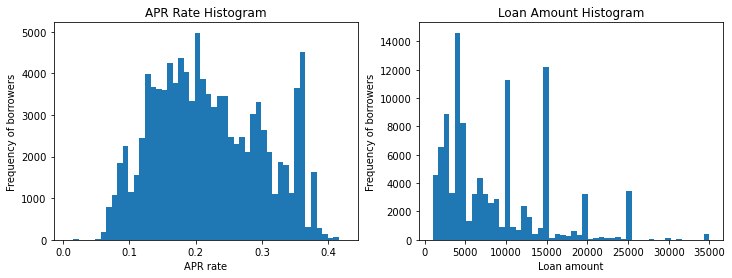

In [43]:
# creating subplots in two columns, and choosing the size for viewing
fig, ax = plt.subplots(ncols=2, figsize = [12,4])

# plotting the graphs, in two columns
ax[0].hist(data = df_loan, x = 'BorrowerAPR', bins = 50);
ax[1].hist(data = df_loan, x = 'LoanOriginalAmount', bins = 50);

ax[0].set_title('APR Rate Histogram')
ax[1].set_title('Loan Amount Histogram')

# naming the x and y-axis of the graphs
ax[0].set_xlabel('APR rate')
ax[1].set_xlabel('Loan amount')
ax[0].set_ylabel('Frequency of borrowers')
ax[1].set_ylabel('Frequency of borrowers')
plt.show()

In APR rate, the concentration of rates is definitely between 0.10 and 0.30, with some peaks close to 0.10, but it may not be very accurate due to the size of the bins. In loan original amount, there are very specific peaks at 5k, 10k, 50k and 25k, which is probably the lines of credit with values pre-established by prosper. However, the highest frequency of data is around 0 to 5k.

#### 3. If I increase the size of the bins, which rate will be most frequent?

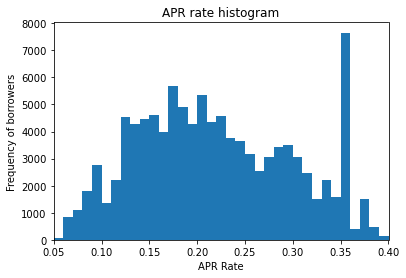

In [46]:
binsize = 0.01 # 
bins = np.arange(0, df_loan['BorrowerAPR'].max()+binsize, binsize) # 

# univariate plot of diamond prices
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = bins);
plt.xlim([0.05, 0.4])
plt.title('APR rate histogram')
plt.xlabel('APR Rate');
plt.ylabel('Frequency of borrowers');

Looking further, changing the size of the bins, it is clear that the highest frequency of rates is 0.35, we will see later what can explain this higher rate with bivariate and multivariate graphs.

#### 4. Which loan values will be most frequent placing the scale in the same proportion?

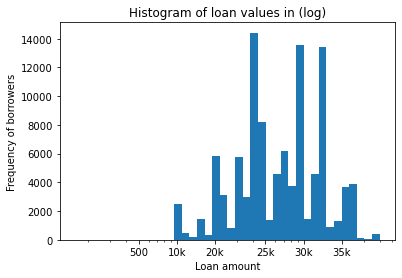

In [47]:
log_binsize = 0.06 # bins size
bins = 10 ** np.arange(2.2, np.log10(df_loan['LoanOriginalAmount'].max())+log_binsize, log_binsize)

# plotting the graph and placing the labels
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins);
plt.title('Histogram of loan values in (log)')
plt.xlabel('Loan amount');
plt.ylabel('Frequency of borrowers');

plt.xscale('log') # inserting the logarithmic scale

plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '10k', '20k', '25k', '30k', '35k']); # inserting the logarithmic scale

The logarithmic scale serves as a magnifying glass to go deeper into the data. It is noted that the frequencies change, as well as the loan ranges most required or approved by prosper. There is a much higher frequency close to 25k, 30k. And between 30k and 35k, what we understand is that these are the most approved credit ranges by prosper.

#### 5. What is the count of open credit lines per borrower?

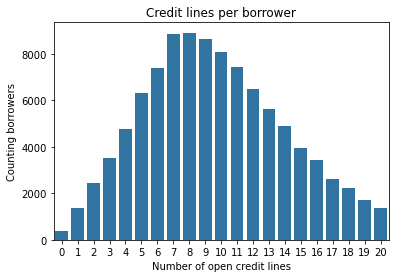

In [48]:
# collecting data with less than or equal to 20
df_loan_credit = df_loan.query('CurrentCreditLines <= 20')

# adjusting the size of the graph
plt.subplots(figsize = [6,4])

# defining the color palette and plotting the graph
default_color = sns.color_palette()[0]
sns.countplot(data = df_loan_credit, x = 'CurrentCreditLines', color = default_color)
plt.title('Credit lines per borrower')
plt.xlabel('Number of open credit lines')
plt.ylabel('Counting borrowers')
plt.show()

In [229]:
df_loan_credit.CurrentCreditLines.mean()

9.587173410865063

When analyzing the open lines of credit that borrowers have at the time of registration, it is clear that the amounts between 6 and 11 are the largest. What corroborates is the calculated average of 9.58 lines of credit per borrower.

#### 6. What is the borrower count by alpha rating and employment status?

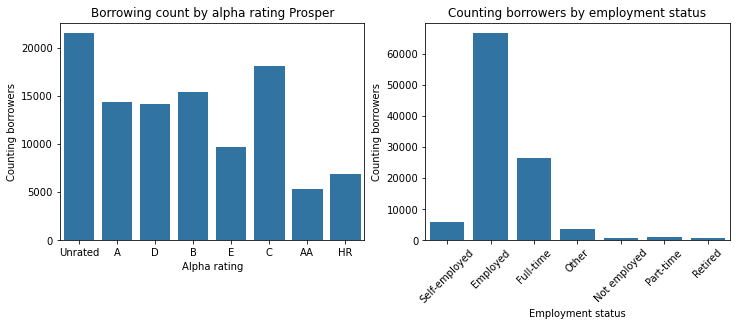

In [51]:
# creating subplots in two columns
fig, ax = plt.subplots(ncols=2, figsize = [12,4])

default_color = sns.color_palette()[0] # adjusting the size of the graph
a = sns.countplot(data = df_loan, x = 'ProsperRating_alpha', color = default_color, ax = ax[0])
b = sns.countplot(data = df_loan, x = 'EmploymentStatus', color = default_color, ax = ax[1])

# to adjust the rotation of the graphics I discovered a tutorial, below the link
# https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html
b.set_xticklabels(b.get_xticklabels(), rotation=45);

ax[0].set_title('Borrowing count by alpha rating Prosper')
ax[1].set_title('Counting borrowers by employment status')

# naming the x and y-axis of the graphs
ax[0].set_xlabel('Alpha rating')
ax[1].set_xlabel('Employment status')
ax[0].set_ylabel('Counting borrowers')
ax[1].set_ylabel('Counting borrowers')
plt.show()

Using the counting graphs, the rating alpha variable contains more unrated data, however class C comes next, and B very close as well. Classes AA and HR contain less data than other classes.

In the employment status data, clearly the employee status is in the vast majority of the data, when filled in by the borrowers, followed by full-time. And then self-employed.

### Summary of univariate exploitation

With the univariate graphs I needed to check each of the variables and get an idea of the data distribution for each one. I basically used histograms and counting graphs for categorical variables. In general the profile of prosper loans is around 36 months, there is no evidence that the borrower needs a mortgage in his name, because the number of those who own and do not have is very close.

APR rates are around 0.05 and 0.4, however they predominate at 0.15 and 0.3 with a very large peak at 0.35, I believe to be the APR rate most used by the company. The loan amount is predominantly between 5k and 35k but with peak values that approach 25k and 30k and between 30k and 35k.

The borrowers' open credit lines have an average of 9. In this stage, I filtered through accounts opened in up to 20 accounts.
There are many unrateds and the most prominent rating is C and the employment status is the employee.


### Bivariate Exploration

In the bivariate exploration, I will insert the variable that I intend to explain ('LoanStatus') combining with the other variables to understand the relationship and what tends to have a greater impact on credit positivity or not.

From now on I will do my analysis removing the unrated data, because I believe that in general the analyzes and graphs will be more accurate due to the number of unrated borrowers.

In [53]:
# placing the labels in descending order
alpha_order = ['HR','E','D','C','B','A','AA']
ordered_alpha = pd.api.types.CategoricalDtype(ordered = True, categories = alpha_order)

In [54]:
df_loan['ProsperRating_alpha'] = df_loan['ProsperRating_alpha'].astype(ordered_alpha)
# putting the variable in the desired order

In [55]:
df_status = df_loan.query('ProsperRating_alpha != "Unrated"') # excluding unrated status

#### 7. Where is the data most concentrated in terms and lines of credit for loan amounts?

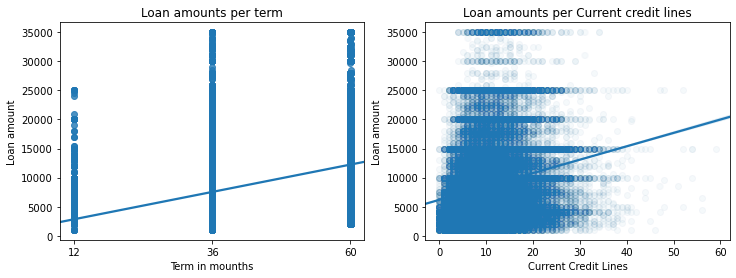

In [58]:
# adjusting the size of the graphics
plt.figure(figsize = [12, 4])

# creating the first chart in the first column
plt.subplot(1, 2, 1)
sns.regplot(data = df_status, x = 'Term', y = 'LoanOriginalAmount', truncate=False, x_jitter=0.03)
plt.xticks([12, 36, 60]) # adjusting the x-axis with the existing terms
plt.title('Loan amounts per term')
plt.xlabel('Term in mounths')
plt.ylabel('Loan amount')

# creating the second chart in the first column
plt.subplot(1, 2, 2)
sns.regplot(data = df_status, x = 'CurrentCreditLines', y = 'LoanOriginalAmount', 
            truncate=False, x_jitter=0.03, scatter_kws={'alpha':1/50})

# adjusting the x-axis with the existing terms
plt.scatter(data = df_status, x = 'CurrentCreditLines', y = 'LoanOriginalAmount', alpha=1/50);
plt.title('Loan amounts per Current credit lines')
plt.xlabel('Current Credit Lines')
plt.ylabel('Loan amount');

In the term chart, there are three conditions for maximum payment terms, 12, 36 and 60 months for loan settlement. The data is concentrated more in the 36 months, although 60 months are very close when loan amount increases, term increases, which is quite plausible. And the lower the amount assigned, the shorter the payment term.

In the relationship between canvas amount and credit lines, there is a very strong concentration between 0 and 20 credit lines. The peak being close to the average of 9 open credit lines. The trend line suggests that the more open credit lines, the higher the loan amount. It is worth mentioning that the loan amount is concentrated between more than 0k and 20k.

#### 8. What is the trend and concentration of the loan amount data with APR rate?

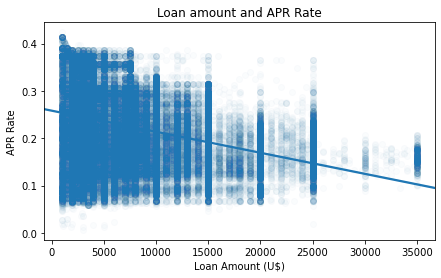

In [235]:
plt.figure(figsize = [7,4])
sns.regplot(data = df_status, x = 'LoanOriginalAmount', y = 'BorrowerAPR',
            truncate=False, x_jitter=0.03, scatter_kws={'alpha':1/50})

plt.title('Loan amount and APR Rate')
plt.xlabel('Loan Amount (U$)')
plt.ylabel('APR Rate');

In this graph I went deeper to identify the concentration of the data in relation to loan amount and APR rate. Staying between 0.5 and 04, but with a higher concentration in 0.1 and 0.3 APR rate and peak in 0.2. The highest loan amount values within this range are greater than 0 and $ 10k.

#### 9. How to know the count of borrowers by the alpha rating, through employment status, terms and if the borrower has a mortgage?

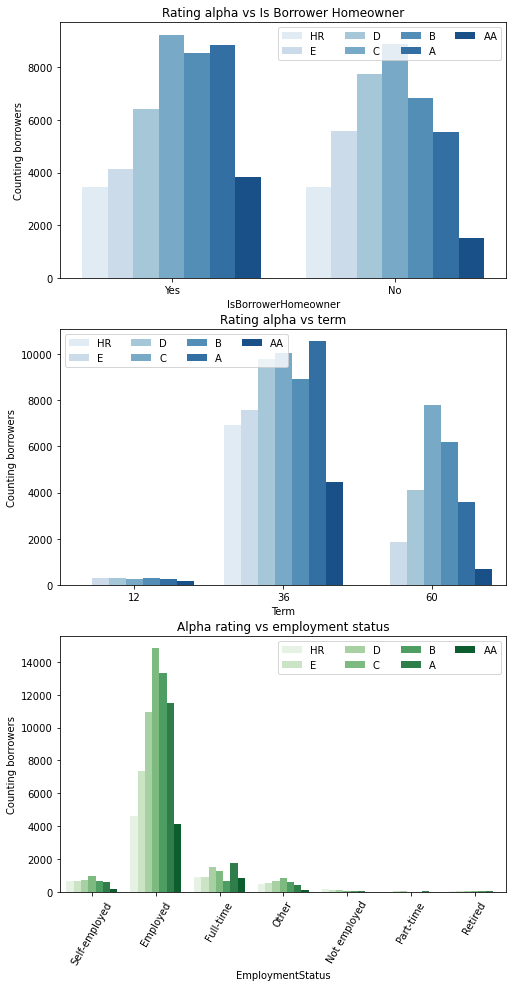

In [81]:
# adjusting the size of the graphics 
plt.figure(figsize = [8, 16])

ax = plt.subplot(3, 1, 1)
sns.countplot(data = df_status, x = 'IsBorrowerHomeowner', hue = 'ProsperRating_alpha', palette = 'Blues')
plt.title('Rating alpha vs Is Borrower Homeowner')
plt.ylabel('Counting borrowers')
ax.legend(loc = 1, ncol = 4) # re-arrange legend to remove overlapping

ax = plt.subplot(3, 1, 2)
sns.countplot(data = df_status, x = 'Term', hue = 'ProsperRating_alpha', palette = 'Blues')
plt.title('Rating alpha vs term')
plt.ylabel('Counting borrowers')
ax.legend(loc = 2, ncol = 4) # re-arrange legend to remove overlapping

ax = plt.subplot(3, 1, 3)
sns.countplot(data = df_status, x = 'EmploymentStatus', hue = 'ProsperRating_alpha', palette = 'Greens')
plt.title('Alpha rating vs employment status')
plt.ylabel('Counting borrowers')
ax.legend(loc = 1, ncol = 4) # re-arrange legend to remove overlapping
plt.xticks(rotation=60);

Counting the alpha rating data with borrowers who have a mortgage and their name, we note that the distribution in both is very close, with class C having the largest amount. For who said 'yes' class A comes in the second position and for someone who said 'no' class D is in the second position. We will see further ahead what may be impacting this difference.

In the end, borrowers' loan contracts predominate over 36 months across all ratings, followed by 60 months. In the C rating, 36 and 60 months are very close, in addition to the B rating. HR only has 36-month AA contracts with few contracts in total in relation to the other ratings.

In the variable employment status, we can see that the largest amount is located in the status of employee informed by the borrower, followed by the status of full-time and with close numbers in self-employed and other. In employee status, the C and B rats are the majority, whereas in full-time the A rating is the majority.

#### 10. What is the frequency of loan amounts for each alpha rating?

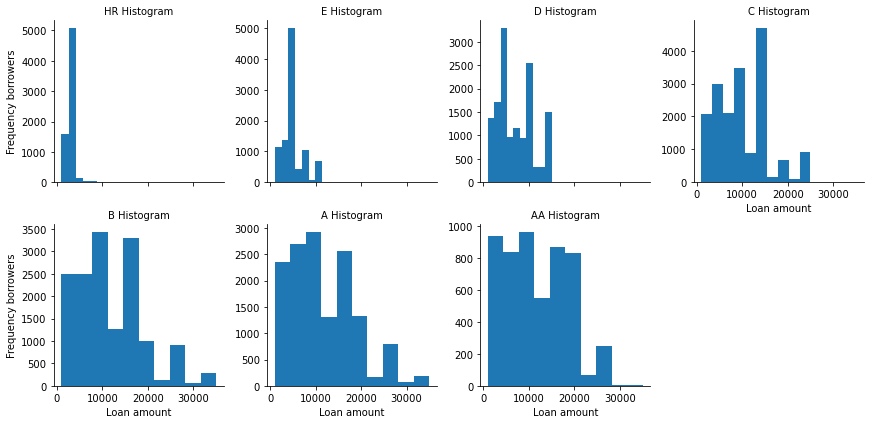

In [73]:
# arranging the charts in multiple rows and columns
g = sns.FacetGrid(data = df_status, col = 'ProsperRating_alpha', col_wrap = 4, sharey = False)
g.map(plt.hist, "LoanOriginalAmount")
g.set_titles(col_template="{col_name} Histogram")
g.set_axis_labels("Loan amount", "Frequency borrowers");

Using several histograms relating to alpha rating and loan values, I was able to verify that HR has values close to 5k, and E to 10k but with a great peak at 5k. The D and C ratings already have higher loan amounts, reaching up to 25k, but mostly 5k and 15k, respectively.

In rating B there are values above 30k with a higher frequency than the previous ratings, the same as the rating A. And with less frequency, but reaching the same values as the previous ones, the rating AA.

#### 11. What is the frequency of APR rate for each alpha rating?

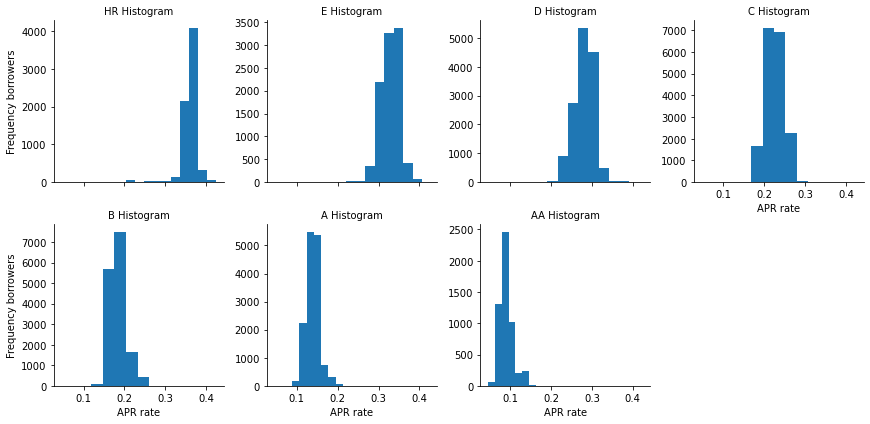

In [74]:
# arranging the charts in multiple rows and columns
g = sns.FacetGrid(data = df_status, col = 'ProsperRating_alpha', col_wrap = 4, sharey = False)
g.map(plt.hist, "BorrowerAPR")
g.set_titles(col_template="{col_name} Histogram")
g.set_axis_labels("APR rate", "Frequency borrowers");

Relating in various histograms, I looked for the frequency of the data in the alpha ratings with APR rate. From left to right, from HR to AA, the rates range from the highest, which is close to 0.4 to the lowest 0.05. We can see so far that the closer to AA the better the APR rates.

#### 12. How often are credit lines opened for each alpha rating?

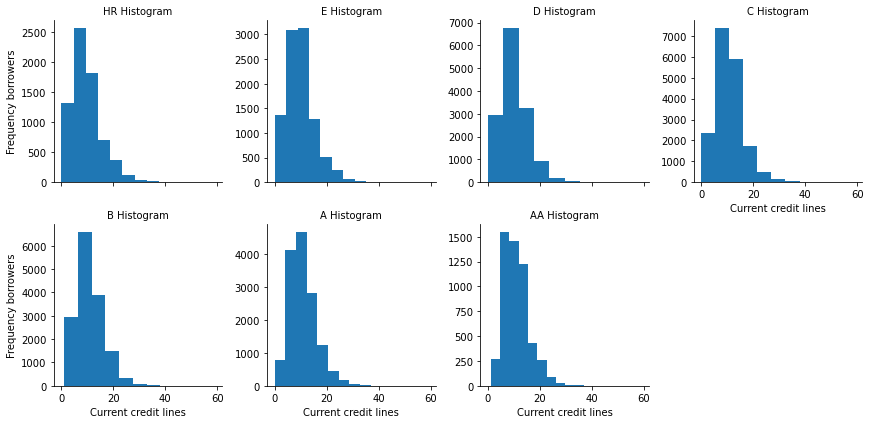

In [75]:
# arranging the charts in multiple rows and columns
g = sns.FacetGrid(data = df_loan, col = 'ProsperRating_alpha', col_wrap = 4, sharey = False)
g.map(plt.hist, "CurrentCreditLines")
g.set_titles(col_template="{col_name} Histogram")
g.set_axis_labels("Current credit lines", "Frequency borrowers");

I decided to plot several histograms in the same section. The interest variable is rating alpha, here in relation to open credit lines. And the data predominantly posted between none and 20 open credit lines, corroborating the average 9, where the peaks of each histogram are found.

### Summary of bivariate exploitation

By generating the bivariate graphs, we can understand a little more the relationship between the variables and the response variable, 'Rating Alpha'. In fact, the lines of credit opened by borrowers, in all cases, are in a range of 0 to 20 and with peaks very close to the average. Therefore, with regard to loan status, it is interesting to note the number of lines of credit opened by borrowers.

Another very important observation is that the amounts of the loan amounts are concentrated in the amounts up to 15k and Prosper has reduced the amount lent to the borrowers, according to the rating of 'HR'. Another important observation is the APR rate, which is in the range of 0.05 and 0.4, but with a concentration of 0.1 to 0.3. Another important detail is that the closer to the 'AA' rating the lower the hiring rate, and the closer to 'HR', the higher the rate.

The time agreed by the variable 'term' in relation to loans predominates in 36 months, medium term loans. Note that the Prosper user profile is probably not the borrower who wants to purchase a property. And yes, maybe cars or urgent needs.

### Multivariate Exploration

In the section of multivariate graphs, I will continue the investigation of the variables in relation to the target variable, 'LoanStatus'. I will try to understand what impacts the status of each loan by merging three variables in a graph or more to look for relationships with each other.

#### 13. Where is the data most concentrated in each alpha rating, relating loan values and APR rate?

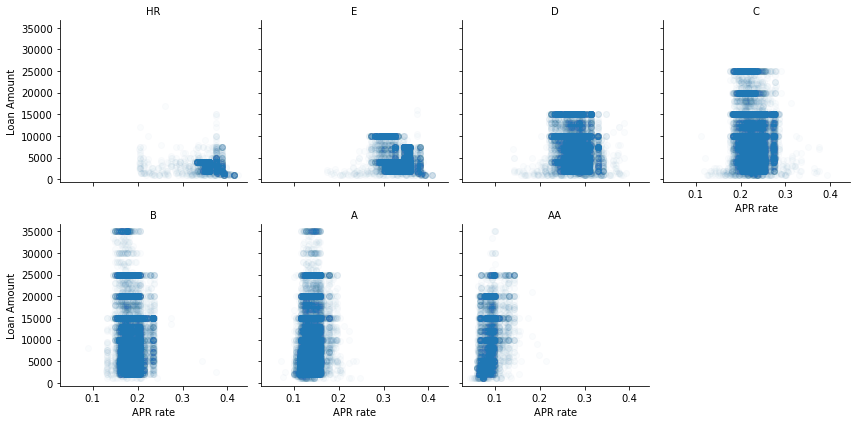

In [76]:
# arranging the charts in multiple rows and columns
g = sns.FacetGrid(data = df_status, col = 'ProsperRating_alpha', col_wrap = 4)
g.map(plt.scatter, 'BorrowerAPR', 'LoanOriginalAmount', alpha=1/50); # plotting multiple scatterplots
g.set_titles(col_template="{col_name}")
g.set_axis_labels("APR rate", "Loan Amount");

Using multivariate scatter plots, we can see in the concentration of the data that the closer to the HR rating the lower the loan value and the higher the rate. The closer to the AA rating loan values go up, APR rates go down

#### 14. Where is the data most concentrated in each alpha rating, relating loan and term values?

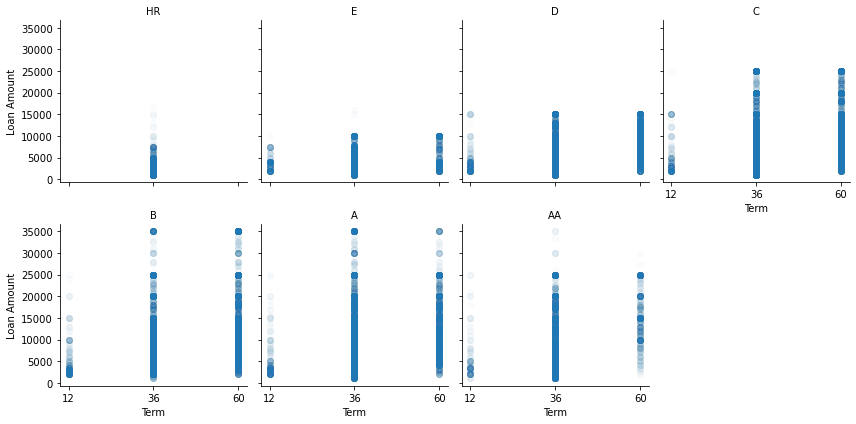

In [77]:
# arranging the charts in multiple rows and columns
g = sns.FacetGrid(data = df_status, col = 'ProsperRating_alpha', col_wrap = 4)
g.map(plt.scatter, 'Term', 'LoanOriginalAmount', alpha=1/50); # plotting multiple scatterplots
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Term", "Loan Amount");
plt.xticks([12, 36, 60]); # adjusting the x-axis with the existing terms

Once again with the scatterplot, I put the term variable with loan values, and the 36-month term prevails in all ratings. However, the concentration of HR to AA changes values and terms, becoming more diversified.

#### 15. Where is the data most concentrated in each alpha rating, relating APR rate and term?

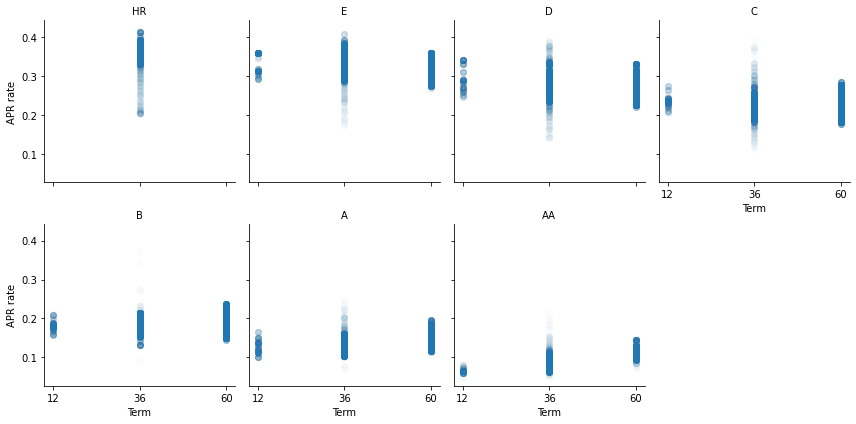

In [78]:
# arranging the charts in multiple rows and columns
g = sns.FacetGrid(data = df_status, col = 'ProsperRating_alpha', col_wrap = 4)
g.map(plt.scatter, 'Term', 'BorrowerAPR', alpha=1/50); # plotting multiple scatterplots
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Term", "APR rate");
plt.xticks([12, 36, 60]); # adjusting the x-axis with the existing terms

Once again with the scatterplot, I put the term variable with loan values, and the 36-month term prevails in all ratings. However, the concentration of HR to AA changes values and terms, becoming more diversified.

#### 16. Where is the data most concentrated in each alpha rating, relating open and term credit lines?

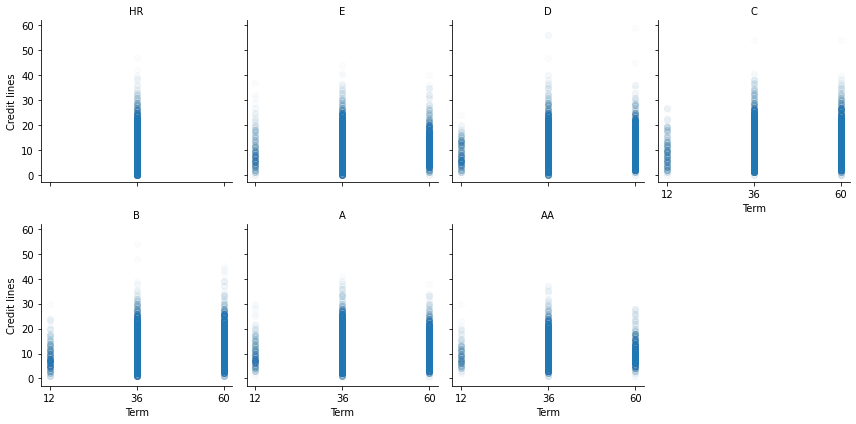

In [79]:
# arranging the charts in multiple rows and columns
g = sns.FacetGrid(data = df_status, col = 'ProsperRating_alpha', col_wrap = 4)
g.map(plt.scatter, 'Term', 'CurrentCreditLines', alpha=1/50); # plotting multiple scatterplots
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Term", "Credit lines");
plt.xticks([12, 36, 60]); # adjusting the x-axis with the existing terms

Relating alpha rating, terms and lines of credit, the closer to HR the more lines of credit the borrower has, with diversified terms. It is interesting to note that the closer to AA the number of lines of credit per borrower falls, the greater the concentration for a 36-month term.

#### 17. What is the trend and average of the data for each alpha rating, relating employment status and APR rate?

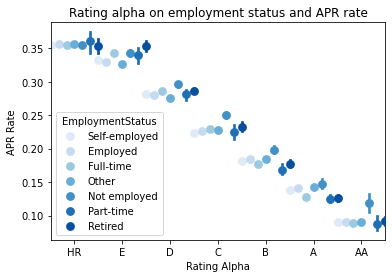

In [244]:
fig = plt.figure(figsize = [6, 4]) # adjusting the size of the graphics
ax = sns.pointplot(data = df_status, x = 'ProsperRating_alpha', y = 'BorrowerAPR', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 1)

plt.title('Rating alpha on employment status and APR rate')
plt.xlabel('Rating Alpha')
plt.ylabel('APR Rate');

The points graph shows that the HR employment status has the highest rates with an average of 0.35 and some variability in part-time and retired. And these points will drop until they reach AA, which is the best rating, with the lowest APR rate on average 0.05 with some variability in not employed.

#### 18. What is the trend and average of the data for each alpha rating, relating open credit lines and loan amounts?

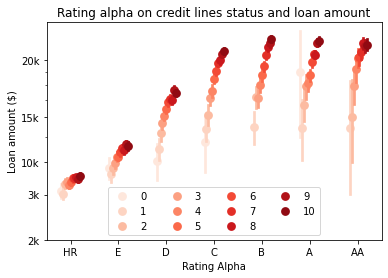

In [245]:
df_status.CurrentCreditLines = df_status.CurrentCreditLines.astype(int)
# slicing the dataset with credit lines less than or equal to 10
df_loan_credit_one = df_status.query('CurrentCreditLines <= 10') 

fig = plt.figure(figsize = [6, 4]) # adjusting the size of the graphics
ax = sns.pointplot(data = df_loan_credit_one, x = 'ProsperRating_alpha', y = 'LoanOriginalAmount', hue = 'CurrentCreditLines',
           palette = 'Reds', linestyles = '', dodge = 0.4)

plt.title('Rating alpha on credit lines status and loan amount')
plt.xlabel('Rating Alpha')
plt.ylabel('Loan amount ($)')
plt.yscale('log') # plotting the y-axis on a logarithmic scale
plt.yticks([2e3, 3e3, 4e3, 6e3, 1e4], ['2k', '3k', '10k', '15k', '20k']) # naming the y-axis labels
ax.legend(loc = 0, ncol = 4);

In this point graph there is greater variability around the average, when the ratings are closer to AA. However, it is quite clear that having more lines of credit open does not mean that the borrower will have more value available. The rating is the most important for the availability of larger amounts.

#### 19. What is the trend and average of the data for each alpha rating, relating term lines and APR rate?

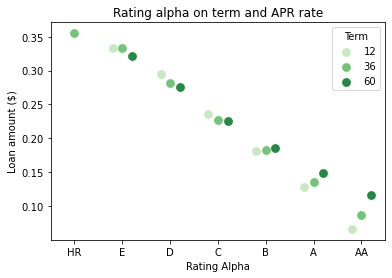

In [246]:
fig = plt.figure(figsize = [6, 4]) # adjusting the size of the graphics
ax = sns.pointplot(data = df_status, x = 'ProsperRating_alpha', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4)

plt.title('Rating alpha on term and APR rate')
plt.xlabel('Rating Alpha')
plt.ylabel('Loan amount ($)')
plt.show();

Once again on this dot chart, it is quite clear that the closer to HR the higher the APR rate, and the closer to AA the lower the rate. However, with regard to loan terms, in general, the longer the term, the higher the contracting rate, regardless of the rating.

### Summary of multivariate exploitation and data exploitation in general

In the exploration of multivariate data, I used several graphs that could relate two variables to the target variable ('alpha classification'). In the first part, I plotted several related scatterplots using the functions of the seaborn and matplotlib packages. In addition to counting charts, histograms and point charts.

For each loan situation I tried to answer through the graphs and relations which impacts the change in each one.

In current terms, loan amounts and APR rates are concentrated, up to 20k and 0.1 to 0.35, respectively. The term is well balanced in number of borrowers, from 36 to 60 months in the maximum terms of the loan and with lines of credit predominantly from 0 to 30 approximately, per borrower.

Relating the data to the alpha rating, I was able to note that the worst rating is the HR and the best AA, since there are in these ratings the best rates and highest loan values made available by Prosper.

In employment status, even as not employed, but being close to the AA rating, the borrower will have the best APR rates available. The point graph shows little variability around the average.

The variable lines of credit opened by borrowers, when filling out the registration form, is also relevant, the graph shows us a trend that the more open lines, the greater the values, however with greater variability around the average.

In addition to the terms of 12, 36 and 60 months. There is a tendency that, once again, APR rates decrease closer to AA, however in AA the 60-month term has higher rates compared to 12 and 36 months. It is interesting to note that from HR to C the 60-month term obtains lower rates.